## __Refactorización de la lectura de archivos__



In [53]:
#Librerias a importar 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

In [54]:
# Leemos los archivos de transient_lightcurves y transient_labels

light = pd.read_csv("../data/transient_lightcurves.csv")
labels = pd.read_csv("../data/transient_labels.csv")

light

,ID,observation_id,Mag,Magerr,MJD
0,TranID1409030010044114444,0,18.8765,0.166417,53766.089871
1,TranID1409030010044114444,1,20.0519,0.281733,53990.458866
2,TranID1409030010044114444,2,20.2199,0.295764,53996.286004
3,TranID1409030010044114444,3,21.1192,0.495390,54385.205789
4,TranID1409030010044114444,4,19.3289,0.195002,54355.282285
...,...,...,...,...,...
440464,TranID1209190181234125108,451469,18.1952,0.123607,56189.314816
440465,TranID1209190181234125108,451470,18.2097,0.124706,56189.322996
440466,TranID1209190181234125108,451471,18.5116,0.138816,56205.285887
440467,TranID1209190181234125108,451472,18.3150,0.128915,56205.292631


In [55]:
# Colocamos como indice la columna y le quitamos "TranID" a los datos de la columna ID

light_set = light.set_index("MJD")
light_set['ID'] = light_set['ID'].astype(str).str.replace('TranID', '').astype(int)

light_set.head()

,ID,observation_id,Mag,Magerr
MJD,,,,
53766.089871,1409030010044114444,0,18.8765,0.166417
53990.458866,1409030010044114444,1,20.0519,0.281733
53996.286004,1409030010044114444,2,20.2199,0.295764
54385.205789,1409030010044114444,3,21.1192,0.495390
54355.282285,1409030010044114444,4,19.3289,0.195002


In [56]:
labels.head()

,Classification,TransientID
0,Flare,1611101400424116462
1,HPM,1611101210274176502
2,HPM,1611101150154137989
3,HPM,1611091630244128695
4,CV,1611091600294129774


In [57]:
labels['Classification'].value_counts().head(50) 

Classification
SN            1723
CV             988
HPM            640
AGN            446
SN?            319
Blazar         243
Unknown        228
Flare          219
AGN?           138
CV?             77
Ast?            68
Var             49
SN/CV           36
Ast             24
SN/AGN          23
YSO             22
Flare?          20
Mira            20
CV/SN           19
Blazar?         19
Comet           15
Var?            15
LPV             11
SN/AGN?         11
SN/Ast          10
Nova             7
SN/CV?           6
SN/TDE           6
AGN/SN           6
YSO?             5
CV/Var           5
Var/Ast          5
Ast/SN           4
Blazar/AGN       4
CV/Ast           4
AGN/Var          4
AGN/SN?          4
CV/AGN           3
CV/AGN?          3
AGN/Blazar       3
SN/Var           3
HPM?             3
TDE?             3
Carb             2
Ast/Var?         2
Variable         2
Var/SN?          2
Ast/CV?          2
Var/SN           2
AGN/CV           2
Name: count, dtype: int64

In [58]:
replace = 'Var|Ast|YSO|Mira|Comet|LPV|LPV|Nova|Unknown|Other?|SN/Other|CV/Other'
labels['Classification'] = labels['Classification'].str.replace(replace, 'Other', regex=True)
labels['Classification'].value_counts().head(50)

Classification
SN              1723
CV               988
HPM              640
AGN              446
Other            376
SN?              319
Blazar           243
Flare            219
AGN?             138
Other?            89
CV?               77
SN/CV             36
SN/AGN            23
Flare?            20
CV/SN             19
Blazar?           19
SN/Other          13
SN/AGN?           11
CV/Other           9
Other/Other        7
AGN/SN             6
SN/TDE             6
Other/SN           6
SN/CV?             6
Other/Other?       5
AGN/Other          4
Blazar/AGN         4
AGN/SN?            4
CV/AGN?            3
TDE?               3
SN/Other?          3
HPM?               3
CV/AGN             3
Other/SN?          3
AGN/Blazar         3
SDSS               2
QSO                2
Carb               2
Other/CV?          2
Other/Flare?       2
CV/Flare           2
Carbon             2
CV/Other?          2
Flare/SN           2
AGN/CV             2
RRL                2
Otheriable         

In [59]:
id_counts = light_set['ID'].value_counts()
labels['Instances'] = labels['TransientID'].map(id_counts)

labels[labels["Instances"]>200].sort_values(by="Instances",ascending=False)

,Classification,TransientID,Instances
1029,Blazar,1502081400484121702,564.0
2230,Flare,1304111230414140313,524.0
5431,CV,801301180474127786,523.0
5363,CV,803051320384107064,519.0
2930,Blazar,1204111210464120236,517.0
...,...,...,...
3134,HPM,1201291490454131189,201.0
2994,AGN,1203221090694114710,201.0
2536,SN,1212040120274106666,201.0
3566,Blazar,1105141600304117225,201.0


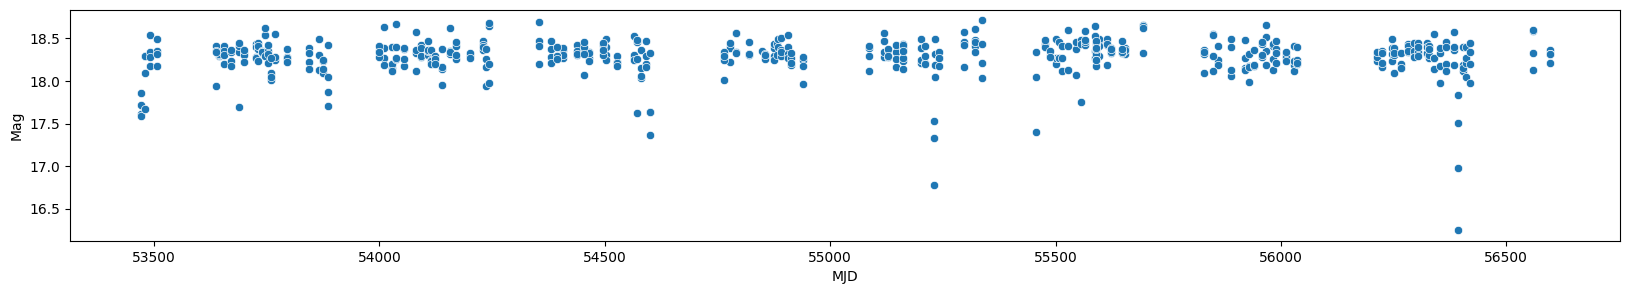

In [60]:
plt.figure(figsize=(20,3))
sns.scatterplot(x = 'MJD', y = 'Mag', data=light_set[light_set["ID"]==1304111230414140313])
plt.show()

In [61]:
med=labels[labels["Instances"]>50].sort_values(by="Instances",ascending=False)
med2=med.value_counts(med["Classification"])
med2

Classification
CV               487
AGN              387
SN               349
Blazar           198
HPM              165
Flare            161
Other            118
AGN?              98
SN?               25
Blazar?           16
CV?               10
Other?             8
Flare?             7
SN/AGN             5
AGN/Other          4
SN/CV              4
AGN/SN             3
SN/AGN?            3
HPM?               3
Blazar/AGN         3
AGN/CV             2
AGN/Blazar         2
Carbon             2
Otheriable         2
QSO                2
CV/AGN             2
Carb               2
CV/Other           2
SDSS               2
RRL                2
FU                 1
Blazar/SN          1
AGB                1
CV/AGN?            1
AGN/Other?         1
HPM/Other?         1
Other/Other        1
Other/Nothing      1
Other/AGN          1
OH_IR              1
O/Ne               1
OH-IR              1
Maser              1
Merger/CV?         1
LHS_5157           1
RRLyrae            1
RCorB              

In [62]:
keep = ["SN","CV","AGN","HPM","Blazar","Flare","Other"]
crit = labels["Classification"].isin(keep)


In [63]:
labels2=labels[crit&(labels["Instances"]>=100)].reset_index().drop(columns=["index"])
labels2=labels2.rename(columns={"TransientID":"ID"})
labels2["Classification"].value_counts().head(10)

Classification
CV        388
AGN       316
SN        226
Blazar    170
Flare     144
Other      89
HPM        75
Name: count, dtype: int64

In [64]:
light_set

,ID,observation_id,Mag,Magerr
MJD,,,,
53766.089871,1409030010044114444,0,18.8765,0.166417
53990.458866,1409030010044114444,1,20.0519,0.281733
53996.286004,1409030010044114444,2,20.2199,0.295764
54385.205789,1409030010044114444,3,21.1192,0.495390
54355.282285,1409030010044114444,4,19.3289,0.195002
...,...,...,...,...
56189.314816,1209190181234125108,451469,18.1952,0.123607
56189.322996,1209190181234125108,451470,18.2097,0.124706
56205.285887,1209190181234125108,451471,18.5116,0.138816


## __Parentesís: Filtrado de IDs no deseados__
#### _(es semiautomatico, no se necesita ejecutar todo después de la primera configuración)_

Los csvs de los nontransient tienen algunos IDs repetidos en varios archivos y de paso, algunas filas repetidas, así que vamos a limpiarlos.

### __Cargamos los df's de los nontransientes__

In [65]:
non_trans_dict = {}
base_path = '../data/nontransient_lightcurves_{}.csv'

for i in range(7):
    non_trans_dict[f'notrans_{i}'] = pd.read_csv(base_path.format(i))
    non_trans_dict[f'notrans_{i}']['ID'] = non_trans_dict[f'notrans_{i}']['ID'].astype(np.int64)

In [66]:
pd.concat(non_trans_dict.values())

,ID,MJD,Mag,Magerr,RA,Decl
0,1121012003070,56251.16733,18.09,0.12,33.72388,19.89408
1,1121012003070,56251.17237,18.11,0.12,33.72390,19.89372
2,1121012003070,56251.17748,18.22,0.13,33.72389,19.89395
3,1121012003070,56251.18261,18.22,0.13,33.72386,19.89393
4,1121012003070,56263.11047,18.20,0.13,33.72382,19.89405
...,...,...,...,...,...,...
1099995,2001317015576,55921.07800,17.99,0.07,341.95830,-1.53560
1099996,2001317015576,55921.08377,17.98,0.07,341.95831,-1.53563
1099997,2001317015576,56187.19955,18.05,0.08,341.95833,-1.53558
1099998,2001317015576,56187.20883,18.07,0.08,341.95830,-1.53560


In [67]:
unique_ids_dict = {}

for idx, i in enumerate(non_trans_dict.values()):
    unique_ids_dict[idx] = i['ID'].unique()

# unique_ids_dict

### __Buscamos cuales son los ids que se repiten entre diferentes df's__

In [68]:
# Concatenar todos los arrays únicos y buscar duplicados
all_unique_ids = np.concatenate(list(unique_ids_dict.values()))
unique_vals, counts = np.unique(all_unique_ids, return_counts=True)
repeated_ids = unique_vals[counts > 1]

print(f"IDs repetidos: {len(repeated_ids)}")
print(repeated_ids[:10])

# Mostrar en qué archivos aparece cada ID repetido
print("\nUbicación de IDs repetidos:")
for rep_id in repeated_ids[:5]:  # Solo los primeros 5 para no saturar
    print(f"\nID {rep_id} aparece en:")
    for key, unique_ids in unique_ids_dict.items():
        if rep_id in unique_ids:
            print(f"nontransient_lightcurves_{key}")

IDs repetidos: 11
[1001089052182 1004077048131 1121012003070 1126003036152 1129022099926
 1138044023962 1138062006397 1138062006409 1138062006432 1140029019345]

Ubicación de IDs repetidos:

ID 1001089052182 aparece en:
nontransient_lightcurves_5
nontransient_lightcurves_6

ID 1004077048131 aparece en:
nontransient_lightcurves_4
nontransient_lightcurves_5

ID 1121012003070 aparece en:
nontransient_lightcurves_0
nontransient_lightcurves_1

ID 1126003036152 aparece en:
nontransient_lightcurves_0
nontransient_lightcurves_1

ID 1129022099926 aparece en:
nontransient_lightcurves_0
nontransient_lightcurves_1


### __Identificamos cuál es el archivo con mas valores para ese id repetido__

In [69]:
id_stats = defaultdict(list)

for rep_id in repeated_ids:
    for idx, df in enumerate(non_trans_dict.values()):
        subset = df[df["ID"] == rep_id]
        total_rows = len(subset)
        if total_rows > 0:
            # cantidad de filas y valores válidos
            id_stats[rep_id].append({
                "archivo": f"nontransient_lightcurves_{idx}",
                "filas": total_rows,
            })
# Paso 3. Mostrar comparativa para decidir
for k, v in id_stats.items():
    print(f"\nID {k}:")
    display(pd.DataFrame(v))


ID 1001089052182:


,archivo,filas
0,nontransient_lightcurves_5,503
1,nontransient_lightcurves_6,189



ID 1004077048131:


,archivo,filas
0,nontransient_lightcurves_4,63
1,nontransient_lightcurves_5,251



ID 1121012003070:


,archivo,filas
0,nontransient_lightcurves_0,52
1,nontransient_lightcurves_1,265



ID 1126003036152:


,archivo,filas
0,nontransient_lightcurves_0,104
1,nontransient_lightcurves_1,35



ID 1129022099926:


,archivo,filas
0,nontransient_lightcurves_0,27
1,nontransient_lightcurves_1,246



ID 1138044023962:


,archivo,filas
0,nontransient_lightcurves_2,75
1,nontransient_lightcurves_3,262



ID 1138062006397:


,archivo,filas
0,nontransient_lightcurves_4,12
1,nontransient_lightcurves_5,12



ID 1138062006409:


,archivo,filas
0,nontransient_lightcurves_4,39
1,nontransient_lightcurves_5,39



ID 1138062006432:


,archivo,filas
0,nontransient_lightcurves_4,729
1,nontransient_lightcurves_5,729



ID 1140029019345:


,archivo,filas
0,nontransient_lightcurves_1,185
1,nontransient_lightcurves_2,59



ID 1146046028662:


,archivo,filas
0,nontransient_lightcurves_3,1
1,nontransient_lightcurves_4,461


### __Ahora hacemos el filtro y el merge y proseguimos con el flujo normal__

In [70]:
ids_eliminar = {
    1001089052182: 6,
    1004077048131: 4,
    1121012003070: 0,
    1126003036152: 1,
    1129022099926: 0,
    1138044023962: 2,
    1138062006397: 4,
    1138062006409: 4,
    1138062006432: 4,
    1140029019345: 2
}

""" ids_preferidos = {
    1001089052182: 5,
    1004077048131: 5,
    1121012003070: 1,
    1126003036152: 0,
    1129022099926: 1,
    1138044023962: 3,
    1138062006397: 4,
    1138062006409: 4,
    1138062006432: 4,
    1140029019345: 1
} """

' ids_preferidos = {\n    1001089052182: 5,\n    1004077048131: 5,\n    1121012003070: 1,\n    1126003036152: 0,\n    1129022099926: 1,\n    1138044023962: 3,\n    1138062006397: 4,\n    1138062006409: 4,\n    1138062006432: 4,\n    1140029019345: 1\n} '

In [71]:
for rep_id, bad_files in ids_eliminar.items():
    print(f'eliminando {rep_id} de nontransient_lightcurves_{bad_files}')
    non_trans_dict[f'notrans_{bad_files}'] = non_trans_dict[f'notrans_{bad_files}'][non_trans_dict[f'notrans_{bad_files}']["ID"] != rep_id]

eliminando 1001089052182 de nontransient_lightcurves_6
eliminando 1004077048131 de nontransient_lightcurves_4
eliminando 1121012003070 de nontransient_lightcurves_0
eliminando 1126003036152 de nontransient_lightcurves_1
eliminando 1129022099926 de nontransient_lightcurves_0
eliminando 1138044023962 de nontransient_lightcurves_2
eliminando 1138062006397 de nontransient_lightcurves_4
eliminando 1138062006409 de nontransient_lightcurves_4
eliminando 1138062006432 de nontransient_lightcurves_4
eliminando 1140029019345 de nontransient_lightcurves_2


In [72]:
non_trans_clean = pd.concat(non_trans_dict.values())
print("Total final de IDs únicos:", non_trans_clean["ID"].nunique())


Total final de IDs únicos: 67694


In [73]:
non_trans_clean

,ID,MJD,Mag,Magerr,RA,Decl
52,1121012003076,53976.40006,21.15,0.53,33.72245,19.90070
53,1121012003076,53976.40550,21.22,0.55,33.72266,19.90032
54,1121012003076,54027.31158,20.36,0.33,33.72203,19.90096
55,1121012003076,53993.45819,20.61,0.39,33.72277,19.90111
56,1121012003076,54353.37083,20.02,0.30,33.72311,19.90097
...,...,...,...,...,...,...
1099995,2001317015576,55921.07800,17.99,0.07,341.95830,-1.53560
1099996,2001317015576,55921.08377,17.98,0.07,341.95831,-1.53563
1099997,2001317015576,56187.19955,18.05,0.08,341.95833,-1.53558
1099998,2001317015576,56187.20883,18.07,0.08,341.95830,-1.53560


In [74]:
#Eliminamos duplicados
non_trans_clean.drop_duplicates(inplace=True)
non_trans_clean

,ID,MJD,Mag,Magerr,RA,Decl
52,1121012003076,53976.40006,21.15,0.53,33.72245,19.90070
53,1121012003076,53976.40550,21.22,0.55,33.72266,19.90032
54,1121012003076,54027.31158,20.36,0.33,33.72203,19.90096
55,1121012003076,53993.45819,20.61,0.39,33.72277,19.90111
56,1121012003076,54353.37083,20.02,0.30,33.72311,19.90097
...,...,...,...,...,...,...
1099995,2001317015576,55921.07800,17.99,0.07,341.95830,-1.53560
1099996,2001317015576,55921.08377,17.98,0.07,341.95831,-1.53563
1099997,2001317015576,56187.19955,18.05,0.08,341.95833,-1.53558
1099998,2001317015576,56187.20883,18.07,0.08,341.95830,-1.53560


### __Continuación del flujo normal__

In [75]:
non_trans_clean['ID'].value_counts()

ID
1129039039243    538
1121042016915    536
1121042016615    536
1129039038663    534
1126042011281    532
                ... 
2114144022376      1
1146067039210      1
3005070020415      1
2007223005009      1
3011017018074      1
Name: count, Length: 67694, dtype: int64

In [76]:

list_non = [pd.DataFrame(non_trans_dict['notrans_0']['ID'].value_counts().head(48))]
for i in range(1, 7):
    list_non.append(pd.DataFrame(non_trans_dict[f'notrans_{i}']['ID'].value_counts().head(42)))

non_trans = pd.concat(list_non).reset_index()

In [77]:
non_trans

,ID,count
0,1115015055531,1212
1,1129001027705,1206
2,1129001026333,1200
3,1004016036673,1180
4,1004016036365,1156
...,...,...
295,1109089074750,594
296,1138077076650,582
297,1018110018911,558
298,1012110003072,546


In [78]:
labels_non = non_trans.copy()
labels_non.rename(columns={'count': 'Instances'}, inplace=True)
labels_non['Classification'] = 'Non-Transient'


In [79]:
labels_non

,ID,Instances,Classification
0,1115015055531,1212,Non-Transient
1,1129001027705,1206,Non-Transient
2,1129001026333,1200,Non-Transient
3,1004016036673,1180,Non-Transient
4,1004016036365,1156,Non-Transient
...,...,...,...
295,1109089074750,594,Non-Transient
296,1138077076650,582,Non-Transient
297,1018110018911,558,Non-Transient
298,1012110003072,546,Non-Transient


In [80]:
intento = non_trans_dict['notrans_0']
intento[intento['ID'] == 1115015055531]

,ID,MJD,Mag,Magerr,RA,Decl
237659,1115015055531,53728.16585,18.53,0.14,43.25431,16.88928
237660,1115015055531,53728.18371,18.77,0.16,43.25437,16.88904
237661,1115015055531,53699.19651,19.05,0.18,43.25463,16.88913
237662,1115015055531,53699.21150,18.51,0.14,43.25477,16.88906
237663,1115015055531,53699.21900,18.95,0.18,43.25439,16.88926
...,...,...,...,...,...,...
238866,1115015055531,56581.30633,18.42,0.14,43.25449,16.88927
238867,1115015055531,56595.30517,18.55,0.15,43.25443,16.88929
238868,1115015055531,56595.30972,18.64,0.15,43.25443,16.88916
238869,1115015055531,56595.31428,18.41,0.14,43.25431,16.88904


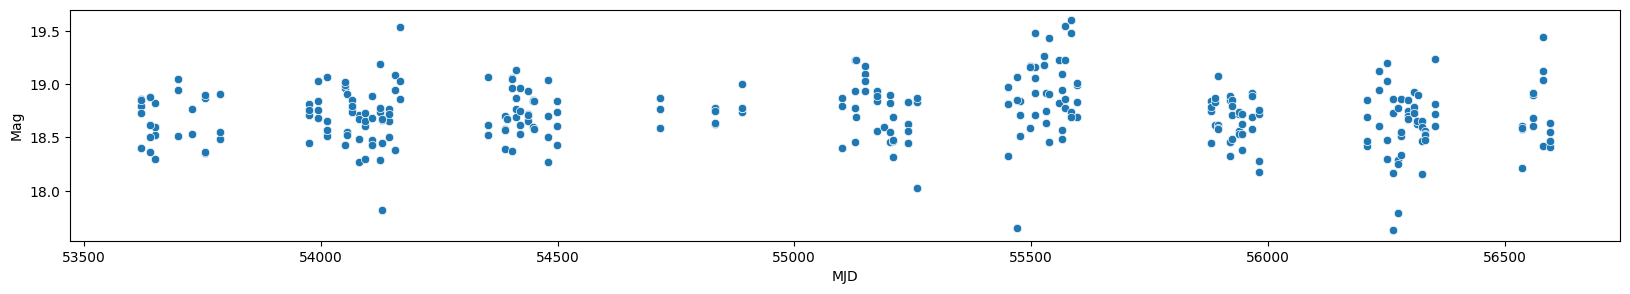

In [81]:
plt.figure(figsize=(20,3))
sns.scatterplot(x = 'MJD', y = 'Mag', data=intento[intento['ID'] == 1115015055531])
plt.show()

In [82]:
light_set.drop(columns=['observation_id'], inplace=True)
light_set

,ID,Mag,Magerr
MJD,,,
53766.089871,1409030010044114444,18.8765,0.166417
53990.458866,1409030010044114444,20.0519,0.281733
53996.286004,1409030010044114444,20.2199,0.295764
54385.205789,1409030010044114444,21.1192,0.495390
54355.282285,1409030010044114444,19.3289,0.195002
...,...,...,...
56189.314816,1209190181234125108,18.1952,0.123607
56189.322996,1209190181234125108,18.2097,0.124706
56205.285887,1209190181234125108,18.5116,0.138816


In [83]:
non_trans_clean.drop(columns=['RA', 'Decl'], inplace=True)
non_trans_clean

,ID,MJD,Mag,Magerr
52,1121012003076,53976.40006,21.15,0.53
53,1121012003076,53976.40550,21.22,0.55
54,1121012003076,54027.31158,20.36,0.33
55,1121012003076,53993.45819,20.61,0.39
56,1121012003076,54353.37083,20.02,0.30
...,...,...,...,...
1099995,2001317015576,55921.07800,17.99,0.07
1099996,2001317015576,55921.08377,17.98,0.07
1099997,2001317015576,56187.19955,18.05,0.08
1099998,2001317015576,56187.20883,18.07,0.08


In [84]:
non_trans_clean.set_index('MJD', inplace=True)

In [85]:
light_setv2 = pd.concat([light_set, non_trans_clean])
light_setv2

,ID,Mag,Magerr
MJD,,,
53766.089871,1409030010044114444,18.8765,0.166417
53990.458866,1409030010044114444,20.0519,0.281733
53996.286004,1409030010044114444,20.2199,0.295764
54385.205789,1409030010044114444,21.1192,0.495390
54355.282285,1409030010044114444,19.3289,0.195002
...,...,...,...
55921.078000,2001317015576,17.9900,0.070000
55921.083770,2001317015576,17.9800,0.070000
56187.199550,2001317015576,18.0500,0.080000


In [86]:
len(light_set['ID'].unique())

4869

In [87]:
labels2

,Classification,ID,Instances
0,Flare,1611101400424116462,316.0
1,HPM,1611091630244128695,116.0
2,HPM,1611071120084120846,305.0
3,Other,1611021070314137583,167.0
4,HPM,1610291630224109495,141.0
...,...,...,...
1403,AGN,712160040604111583,285.0
1404,CV,712151210224139942,107.0
1405,Other,711191290084136060,185.0
1406,CV,711151400724125465,364.0


In [88]:
labels2 = pd.concat([labels2, labels_non])

In [89]:
labels2

,Classification,ID,Instances
0,Flare,1611101400424116462,316.0
1,HPM,1611091630244128695,116.0
2,HPM,1611071120084120846,305.0
3,Other,1611021070314137583,167.0
4,HPM,1610291630224109495,141.0
...,...,...,...
295,Non-Transient,1109089074750,594.0
296,Non-Transient,1138077076650,582.0
297,Non-Transient,1018110018911,558.0
298,Non-Transient,1012110003072,546.0


In [90]:
labelsID = labels2['ID'].unique()
labelsID

array([1611101400424116462, 1611091630244128695, 1611071120084120846, ...,
             1018110018911,       1012110003072,       1001089052065],
      shape=(1708,))

In [91]:
labels2.to_csv('../res/transient_labels2.csv', index=False)
light_setv2.to_csv('../res/transient_lightcurves_v2.csv', index=True)
light_setv2[light_setv2['ID'].isin(labelsID)].to_csv('../res/transient_lightcurves_v2_filtered.csv', index=True)

In [92]:
labels2["Classification"].value_counts()


Classification
CV               388
AGN              316
Non-Transient    300
SN               226
Blazar           170
Flare            144
Other             89
HPM               75
Name: count, dtype: int64

In [93]:
labels2[labels2["Classification"]=="Non-Transient"].head(20)


,Classification,ID,Instances
0,Non-Transient,1115015055531,1212.0
1,Non-Transient,1129001027705,1206.0
2,Non-Transient,1129001026333,1200.0
3,Non-Transient,1004016036673,1180.0
4,Non-Transient,1004016036365,1156.0
5,Non-Transient,1004016036435,1040.0
6,Non-Transient,2116039016369,976.0
7,Non-Transient,2116039016628,972.0
8,Non-Transient,2116039016724,956.0
9,Non-Transient,1132002055097,936.0


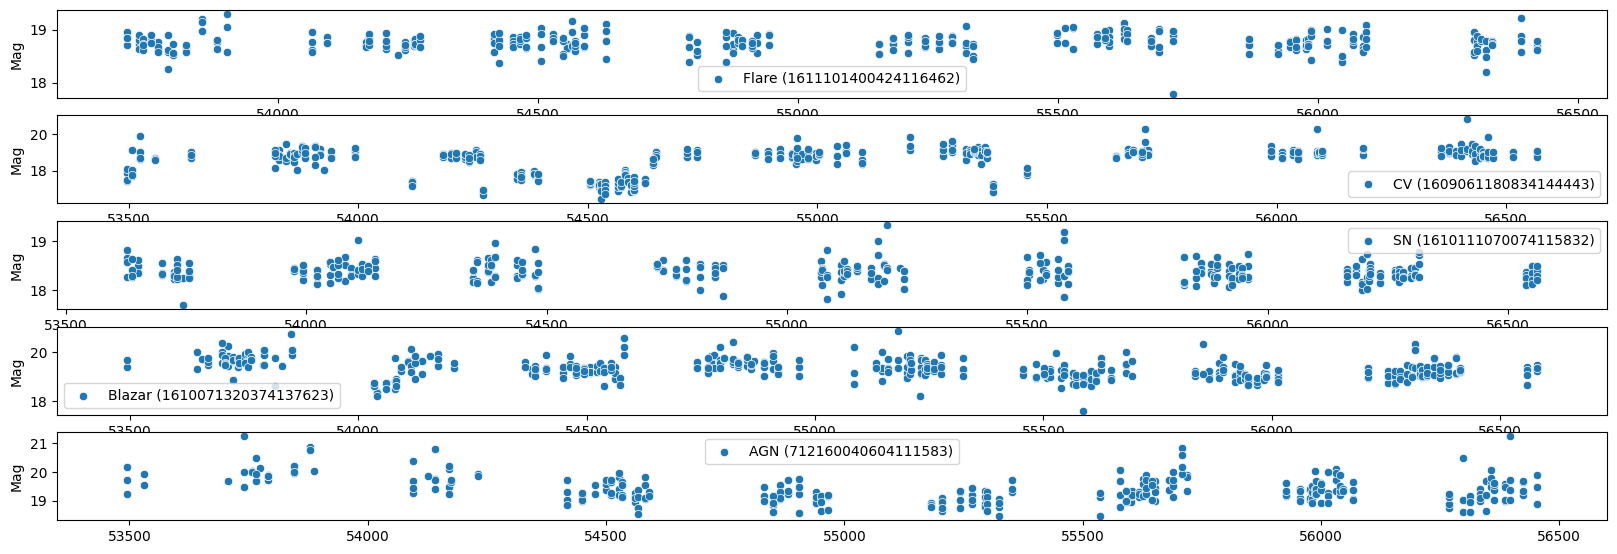

In [94]:
plt.figure(figsize=(20,8))
plt.subplot(6,1,1)
sns.scatterplot(x="MJD", y="Mag", data=light_set[light_set["ID"]==1611101400424116462],label="Flare (1611101400424116462)")
plt.xlabel(None)
plt.subplot(6,1,2)
sns.scatterplot(x="MJD", y="Mag", data=light_set[light_set["ID"]==1609061180834144443],label="CV (1609061180834144443)")
plt.xlabel(None)
plt.subplot(6,1,3)
sns.scatterplot(x="MJD", y="Mag", data=light_set[light_set["ID"]==1610111070074115832],label="SN (1610111070074115832)")
plt.xlabel(None)
plt.subplot(6,1,4)
sns.scatterplot(x="MJD", y="Mag", data=light_set[light_set["ID"]==1610071320374137623],label="Blazar (1610071320374137623)")
plt.xlabel(None)
plt.subplot(6,1,5)
sns.scatterplot(x="MJD", y="Mag", data=light_set[light_set["ID"]==712160040604111583],label="AGN (712160040604111583)")
plt.xlabel(None)
plt.show()